# Анализ фильмов с Кинопоиска
__Подготовили:__ Стержанова Виталия, Купцова Александра и Мукимова Алина

# Шаг 1: выбор темы

В качестве темы проекта мы выбрали анализ данных о фильмах с Кинопоиска.

# Шаг 2: cбор данных

Для начала спарсим данные о 4000 фильмах с Кинопоиска.

In [2]:
import requests
import datetime
import json

headers = {"X-API-KEY": "DHV3YYD-S2Z4D9T-P0Y4VDD-YKB776Q"}


def get_movies_for_last_year():
    params = {
        'selectFields': 'name movieLength genres rating type votes year budget fees distributors premiere',
        'type': 'movie',
        'sortField': 'votes.kp',
        'sortType': '-1',
        'limit': 4000
    }
    response = requests.get(
        'https://api.kinopoisk.dev/v1.3/movie',
        headers=headers,
        params=params
    )

    return response.text


movies = get_movies_for_last_year()
movies = movies.replace('\xa0', ' ')

with open('data.txt', 'w', encoding='utf-8') as file:
    file.write(str(json.loads(movies)))
    file.flush()

formatted = json.loads(movies)
print(len(formatted['docs']))
# print(json.dumps(formatted, sort_keys=True, indent=4, ensure_ascii=True))

4000


In [3]:
dict = formatted['docs']

Создадим датафрейм с данными:

In [257]:
import pandas as pd
df_l = pd.json_normalize(dict)
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
0,112.0,movie,1+1,2011,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",426588510.0,$,1725813.0,$,10198820.0,...,12,15,Каскад фильм,Новый Диск,2011-09-23T00:00:00.000Z,2012-04-26T00:00:00.000Z,9500000.0,€,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[{'name': 'криминал'}, {'name': 'комедия'}, {'...",115171795.0,$,18003343.0,$,36471795.0,...,22,13642,Вольга,None,2019-12-03T00:00:00.000Z,2020-02-13T00:00:00.000Z,22000000.0,$,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",392000694.0,$,13796916.0,$,116900694.0,...,31,43024,West,West Video,2013-12-09T00:00:00.000Z,2014-02-06T00:00:00.000Z,100000000.0,$,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[{'name': 'боевик'}, {'name': 'триллер'}]",103966489.0,$,13318455.0,$,27466489.0,...,37,23492,Вольга,None,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,40000000.0,$,NaN,NaN
4,100.0,movie,Брат,1997,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",1362281.0,$,NaN,NaN,NaN,...,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17T00:00:00.000Z,1997-12-12T00:00:00.000Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,movie,Короли лета,2013,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",1501595.0,$,4252.0,$,1315590.0,...,1,232,"All Media, Арена",None,2013-01-19T00:00:00.000Z,2013-10-03T00:00:00.000Z,NaN,NaN,NaN,NaN
3996,116.0,movie,Lil Peep: всё для всех,2019,"[{'name': 'документальный'}, {'name': 'музыка'}]",748539.0,$,198254.0,$,547207.0,...,6,262,A-One Films,None,2019-01-10T00:00:00.000Z,2019-11-21T00:00:00.000Z,NaN,NaN,NaN,NaN
3997,85.0,movie,Фантомы,2008,[{'name': 'ужасы'}],48555306.0,$,1811000.0,$,25928550.0,...,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19T00:00:00.000Z,2008-04-03T00:00:00.000Z,8000000.0,$,NaN,NaN
3998,103.0,movie,Выход,2019,"[{'name': 'боевик'}, {'name': 'комедия'}]",79410586.0,$,NaN,NaN,470699.0,...,0,37,None,None,2019-07-31T00:00:00.000Z,NaN,11500000.0,$,NaN,NaN


# Шаг 3: Предварительныя обработка (максимум 10 баллов)

Теперь займемся обработкой данных.

### 1. Поработаем с форматом переменных:
Преобразуем столбец с жанрами в список, чтобы было удобнее работать:

In [258]:
import re
df_l['genres'] = df_l['genres'].apply(lambda x: re.findall(r"'name': '([^']*)'", str(x)))

In [259]:
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
0,112.0,movie,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,...,12,15,Каскад фильм,Новый Диск,2011-09-23T00:00:00.000Z,2012-04-26T00:00:00.000Z,9500000.0,€,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,...,22,13642,Вольга,None,2019-12-03T00:00:00.000Z,2020-02-13T00:00:00.000Z,22000000.0,$,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,...,31,43024,West,West Video,2013-12-09T00:00:00.000Z,2014-02-06T00:00:00.000Z,100000000.0,$,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,...,37,23492,Вольга,None,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,40000000.0,$,NaN,NaN
4,100.0,movie,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,...,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17T00:00:00.000Z,1997-12-12T00:00:00.000Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,movie,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,$,4252.0,$,1315590.0,...,1,232,"All Media, Арена",None,2013-01-19T00:00:00.000Z,2013-10-03T00:00:00.000Z,NaN,NaN,NaN,NaN
3996,116.0,movie,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,$,198254.0,$,547207.0,...,6,262,A-One Films,None,2019-01-10T00:00:00.000Z,2019-11-21T00:00:00.000Z,NaN,NaN,NaN,NaN
3997,85.0,movie,Фантомы,2008,[ужасы],48555306.0,$,1811000.0,$,25928550.0,...,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19T00:00:00.000Z,2008-04-03T00:00:00.000Z,8000000.0,$,NaN,NaN
3998,103.0,movie,Выход,2019,"[боевик, комедия]",79410586.0,$,NaN,NaN,470699.0,...,0,37,None,None,2019-07-31T00:00:00.000Z,NaN,11500000.0,$,NaN,NaN


Далее преобразуем столбцы с датами в более удобный формат datetime:

In [260]:
df_l['premiere.world'] = pd.to_datetime(df_l['premiere.world'])
df_l['premiere.russia'] = pd.to_datetime(df_l['premiere.russia'])

In [261]:
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
0,112.0,movie,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,...,12,15,Каскад фильм,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,9500000.0,€,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,...,22,13642,Вольга,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,$,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,...,31,43024,West,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,$,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,...,37,23492,Вольга,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,$,NaN,NaN
4,100.0,movie,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,...,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,movie,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,$,4252.0,$,1315590.0,...,1,232,"All Media, Арена",None,2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN
3996,116.0,movie,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,$,198254.0,$,547207.0,...,6,262,A-One Films,None,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,NaN,NaN,NaN,NaN
3997,85.0,movie,Фантомы,2008,[ужасы],48555306.0,$,1811000.0,$,25928550.0,...,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0,$,NaN,NaN
3998,103.0,movie,Выход,2019,"[боевик, комедия]",79410586.0,$,NaN,NaN,470699.0,...,0,37,None,None,2019-07-31 00:00:00+00:00,NaT,11500000.0,$,NaN,NaN


In [262]:
df_l.dtypes

movieLength                                    float64
type                                            object
name                                            object
year                                             int64
genres                                          object
fees.world.value                               float64
fees.world.currency                             object
fees.russia.value                              float64
fees.russia.currency                            object
fees.usa.value                                 float64
fees.usa.currency                               object
rating.kp                                      float64
rating.imdb                                    float64
rating.filmCritics                             float64
rating.russianFilmCritics                      float64
rating.await                                   float64
votes.kp                                         int64
votes.imdb                                       int64
votes.film

### 2. Теперь обработаем пропуски

In [263]:
df_l.isna().sum()

movieLength                           1
type                                  0
name                                  0
year                                  0
genres                                0
fees.world.value                    421
fees.world.currency                 421
fees.russia.value                  1276
fees.russia.currency               1276
fees.usa.value                     1167
fees.usa.currency                  1167
rating.kp                             0
rating.imdb                           0
rating.filmCritics                    0
rating.russianFilmCritics             0
rating.await                       3999
votes.kp                              0
votes.imdb                            0
votes.filmCritics                     0
votes.russianFilmCritics              0
votes.await                           0
distributors.distributor           1111
distributors.distributorRelease    1512
premiere.world                      145
premiere.russia                     895


In [264]:
df_l[df_l['movieLength'].isnull()]

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd
3481,NaN,movie,Не игра,2018,[драма],NaN,NaN,NaN,NaN,NaN,...,0,6,None,None,2018-02-16 00:00:00+00:00,NaT,NaN,None,None,None


В MovieLength один пропуск, это фильм "Не игра" -> удаляем строчку

In [265]:
df_l = df_l.drop(df_l[df_l['name'] == 'Не игра'].index)

Довольно много пропусков в колонках premiere.digital, rating.await, premiere.dvd: от 3993 до 3998 (всего 4000 наблюдений). В таком случае удалим их. Также удалим type, так как мы отбирали только фильмы.

In [266]:
df_l['type'].value_counts()

movie    3999
Name: type, dtype: int64

In [267]:
df_l_dropped = df_l.drop(['premiere.digital', 'premiere.dvd', 'rating.await', 'type'], axis=1)

Валюту нужно привести к единому значению -> переводим евро в доллары

Для начала посмотрим, какая валюта вообще есть:

In [268]:
df_l_dropped['fees.world.currency'].value_counts()

$    3579
Name: fees.world.currency, dtype: int64

In [269]:
df_l_dropped['fees.russia.currency'].value_counts()

$    2724
Name: fees.russia.currency, dtype: int64

In [270]:
df_l_dropped['fees.usa.currency'].value_counts()

$    2833
Name: fees.usa.currency, dtype: int64

То есть все сборы в $, здесь переводить ничего не надо. Посмотрим на бюджет:

In [271]:
df_l_dropped['budget.currency'].value_counts()

$      2665
₽       128
€       102
£        26
FRF      11
р.        9
DKK       6
CA$       6
A$        4
DEM       3
NOK       3
HK$       2
SEK       1
₹         1
CN¥       1
₴         1
ATS       1
FIM       1
HUF       1
Name: budget.currency, dtype: int64

Здесь довольно много разных валют, которые встречаются по паре раз. Удалим эти фильмы, а рубли, евро и фунты переведем в $ по текущему курсу:

In [272]:
df_l_dropped.loc[df_l_dropped['budget.currency'] == '€', 'budget.value'] *= 1.09
df_l_dropped.loc[df_l_dropped['budget.currency'] == '₽', 'budget.value'] *= 0.012
df_l_dropped.loc[df_l_dropped['budget.currency'] == '£', 'budget.value'] *= 1.26

In [273]:
df_l_dropped = df_l_dropped[
    (df_l_dropped['budget.currency'] == '€') |
    (df_l_dropped['budget.currency'] == '$') |
    (df_l_dropped['budget.currency'] == '₽') |
    (df_l_dropped['budget.currency'] == '£') |
    (df_l_dropped['budget.currency'].isnull())
]

In [274]:
df_l_dropped['budget.currency'].value_counts()

$    2665
₽     128
€     102
£      26
Name: budget.currency, dtype: int64

In [275]:
df_l_dropped

,movieLength,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency,...,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,$,...,882411,130,12,15,Каскад фильм,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0,€
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,$,...,361184,277,22,13642,Вольга,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,$
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,$,...,1465395,289,31,43024,West,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,$
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,$,...,190690,256,37,23492,Вольга,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,$
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,NaN,...,22847,5,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,$,4252.0,$,1315590.0,$,...,82970,123,1,232,"All Media, Арена",None,2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,NaN,NaN
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,$,198254.0,$,547207.0,$,...,3755,21,6,262,A-One Films,None,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,NaN,NaN
3997,85.0,Фантомы,2008,[ужасы],48555306.0,$,1811000.0,$,25928550.0,$,...,36172,66,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0,$
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,$,NaN,NaN,470699.0,$,...,6843,6,0,37,None,None,2019-07-31 00:00:00+00:00,NaT,11500000.0,$


Теперь можем удалить стоблцы с валютой, так как у нас все значения в $ (с пропусками мы еще поработаем ниже):

In [276]:
df_l_dropped = df_l_dropped.drop(['fees.world.currency', 'fees.russia.currency', 'fees.usa.currency', 'budget.currency'], axis=1)
df_l_dropped

,movieLength,name,year,genres,fees.world.value,fees.russia.value,fees.usa.value,rating.kp,rating.imdb,rating.filmCritics,...,votes.kp,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,1725813.0,10198820.0,8.805,8.5,6.8,...,1582052,882411,130,12,15,Каскад фильм,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,18003343.0,36471795.0,8.548,7.8,6.5,...,1404260,361184,277,22,13642,Вольга,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,13796916.0,116900694.0,7.973,8.2,7.8,...,1116549,1465395,289,31,43024,West,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,13318455.0,27466489.0,7.590,7.1,6.3,...,1085059,190690,256,37,23492,Вольга,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,NaN,NaN,8.294,7.8,7.6,...,1058255,22847,5,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,4252.0,1315590.0,6.769,7.1,6.9,...,23908,82970,123,1,232,"All Media, Арена",None,2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,NaN
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,198254.0,547207.0,7.877,7.5,7.4,...,23904,3755,21,6,262,A-One Films,None,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,NaN
3997,85.0,Фантомы,2008,[ужасы],48555306.0,1811000.0,25928550.0,6.194,5.2,3.5,...,23882,36172,66,1,0,Двадцатый Век Фокс СНГ,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,NaN,470699.0,7.354,7.0,6.0,...,23881,6843,6,0,37,None,None,2019-07-31 00:00:00+00:00,NaT,11500000.0


Заполним пропуски в столбцах со сборами и бюджетом средними значениями:

In [277]:
mfees_value_world = round(df_l_dropped['fees.world.value'].mean()) # Вычисление среднего значения столбца "fees.world.value" для отфильтрованных строк
mfees_value_world

125275568

In [278]:
mfees_value_russia = round(df_l_dropped['fees.russia.value'].mean())
mfees_value_russia

4345349

In [279]:
mfees_value_usa = round(df_l_dropped['fees.usa.value'].mean())
mfees_value_usa

65760649

In [280]:
mbudget_value = round(df_l_dropped['budget.value'].mean())
mbudget_value

45809569

In [281]:
# Замена пропущенных значений
df_l_dropped['fees.world.value'] = df_l_dropped['fees.world.value'].fillna(mfees_value_world)
df_l_dropped['fees.russia.value'] = df_l_dropped['fees.russia.value'].fillna(mfees_value_russia)
df_l_dropped['fees.usa.value'] = df_l_dropped['fees.usa.value'].fillna(mfees_value_usa)
df_l_dropped['budget.value'] = df_l_dropped['budget.value'].fillna(mbudget_value)

In [282]:
df_l_dropped.isna().sum()

movieLength                           0
name                                  0
year                                  0
genres                                0
fees.world.value                      0
fees.russia.value                     0
fees.usa.value                        0
rating.kp                             0
rating.imdb                           0
rating.filmCritics                    0
rating.russianFilmCritics             0
votes.kp                              0
votes.imdb                            0
votes.filmCritics                     0
votes.russianFilmCritics              0
votes.await                           0
distributors.distributor           1089
distributors.distributorRelease    1495
premiere.world                      145
premiere.russia                     875
budget.value                          0
dtype: int64

In [283]:
df_l_dropped['budget.value'].head(10)

0     10355000.0
1     22000000.0
2    100000000.0
3     40000000.0
4     45809569.0
5     18000000.0
6    237000000.0
7     25000000.0
8    160000000.0
9     60000000.0
Name: budget.value, dtype: float64

Заполняем пропуски дистрибьютеров на "other", а столбец distributors.distributorRelease удалим, так как он не понадобиться для дальнейшего анализа.

In [284]:
df_l_dropped['distributors.distributor'] = df_l_dropped['distributors.distributor'].fillna('other')
df_l_dropped.drop('distributors.distributorRelease', axis=1, inplace=True)

Поработаем с колонками премьер (premiere.world и premiere.russia):

Проверим, как много фильмов с известной датой премьеры в России, но неизвестной в мировом прокате:

In [285]:
(df_l_dropped['premiere.russia'].isnull() & df_l_dropped['premiere.world'].notnull()).sum()

853

Посмотрим, как много фильмов с известной датой премьеры в мировом прокате, но неизвестной в России:

In [286]:
(df_l_dropped['premiere.world'].isnull() & df_l_dropped['premiere.russia'].notnull()).sum()

123

Наконец, проверим, как много фильмов с неизвестной датов премьеры в мире и в РФ:

In [287]:
(df_l_dropped['premiere.world'].isnull() & df_l_dropped['premiere.russia'].isnull()).sum()

22

Таким образом, лучше всего будет заполнить пропуски в даты примьеры в РФ соотвествующими датами в мировом прокате, и наоброт. Остальные 22 фильма лучше удалить, потому что если их заполнить, к примеру, модой, то это может исказить дальнейший анализ.

In [288]:
df_l_dropped.loc[df_l_dropped['premiere.world'].isnull() & df_l_dropped['premiere.russia'].notnull(), 'premiere.world'] = df_l_dropped['premiere.russia']
df_l_dropped.loc[df_l_dropped['premiere.russia'].isnull() & df_l_dropped['premiere.world'].notnull(), 'premiere.russia'] = df_l_dropped['premiere.world']

In [289]:
df_l_dropped.dropna(subset=['premiere.world'], inplace=True)

In [290]:
df_l_dropped.isna().sum()

movieLength                  0
name                         0
year                         0
genres                       0
fees.world.value             0
fees.russia.value            0
fees.usa.value               0
rating.kp                    0
rating.imdb                  0
rating.filmCritics           0
rating.russianFilmCritics    0
votes.kp                     0
votes.imdb                   0
votes.filmCritics            0
votes.russianFilmCritics     0
votes.await                  0
distributors.distributor     0
premiere.world               0
premiere.russia              0
budget.value                 0
dtype: int64

Пропусков больше нет, летим дальше!

In [291]:
df_final = df_l_dropped

### 3. Опишем данные

In [292]:
df_final

,movieLength,name,year,genres,fees.world.value,fees.russia.value,fees.usa.value,rating.kp,rating.imdb,rating.filmCritics,rating.russianFilmCritics,votes.kp,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,premiere.world,premiere.russia,budget.value
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,1725813.0,10198820.0,8.805,8.5,6.8,100.0000,1582052,882411,130,12,15,Каскад фильм,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,18003343.0,36471795.0,8.548,7.8,6.5,86.3636,1404260,361184,277,22,13642,Вольга,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,13796916.0,116900694.0,7.973,8.2,7.8,77.4194,1116549,1465395,289,31,43024,West,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,13318455.0,27466489.0,7.590,7.1,6.3,72.9730,1085059,190690,256,37,23492,Вольга,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,4345349.0,65760649.0,8.294,7.8,7.6,0.0000,1058255,22847,5,2,0,"Кармен-Премьер, СТВ",1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,45809569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,4252.0,1315590.0,6.769,7.1,6.9,0.0000,23908,82970,123,1,232,"All Media, Арена",2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,45809569.0
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,198254.0,547207.0,7.877,7.5,7.4,66.6667,23904,3755,21,6,262,A-One Films,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,45809569.0
3997,85.0,Фантомы,2008,[ужасы],48555306.0,1811000.0,25928550.0,6.194,5.2,3.5,0.0000,23882,36172,66,1,0,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,4345349.0,470699.0,7.354,7.0,6.0,0.0000,23881,6843,6,0,37,other,2019-07-31 00:00:00+00:00,2019-07-31 00:00:00+00:00,11500000.0


In [293]:
df_final.dtypes

movieLength                              float64
name                                      object
year                                       int64
genres                                    object
fees.world.value                         float64
fees.russia.value                        float64
fees.usa.value                           float64
rating.kp                                float64
rating.imdb                              float64
rating.filmCritics                       float64
rating.russianFilmCritics                float64
votes.kp                                   int64
votes.imdb                                 int64
votes.filmCritics                          int64
votes.russianFilmCritics                   int64
votes.await                                int64
distributors.distributor                  object
premiere.world               datetime64[ns, UTC]
premiere.russia              datetime64[ns, UTC]
budget.value                             float64
dtype: object

Опишем содержание каждой переменной:
1. movieLength — длина фильма в минутах
2. name — название фильма
3. year — год выпуска фильма
4. genres — жанры фильма
5. fees.world.value — сколько собрал фильм в мировом прокате
6. fees.russia.value — сколько собрал фильм в РФ
7. fees.usa.value — сколько собрал фильм в США
8. rating.kp — рейтинг фильма на Кинопоиске
9. rating.imdb — рейтинг фильма на IMDB
10. rating.filmCritics — рейтинг фильма у кинокритиков
11. rating.russianFilmCritics — рейтинг фильма у кинокритиков в РФ
12. votes.kp — количество голосов (оценок) на Кинопоиске
13. votes.imdb — количество голосов (оценок) на IMDB
14. votes.filmCritics — количество голосов кинокритиков
15. votes.russianFilmCritics — количество голосов кинокритиков из РФ
16. votes.await — количество пользователей, которые ожидали выхода фильма 
17. distributors.distributor — дистрибьютор (или прокатчик) фильма в РФ
18. premiere.world — дата мировой премьеры
19. premiere.russia — дата премьеры в РФ
20. budget.value — бюджет фильма

# Шаг 4. Визуализация (максимум 20 баллов)

In [41]:
import matplotlib.pyplot as plt

# Шаг 6. Гипотезы (максимум 20 баллов)

Основная цель нашего проекта - научиться предсказывать кассовые сборы фильмов. На этапе визуализации, мы заметили, что на показатель сборов фильма/сериалы влияют такие метрики, как:

- Период шоков
- Дата выхода (выходной не выходной)
- Длительность фильма
- Бюджет фильма

Начнем тестирование гипотез, которые сформулируем точнее далее. Сейчас необходимо добавить переменные, которые перевидут категориальные признаки в бинарный вид

In [294]:
# Посмотрим на года, по которым у нас есть данные
unique_values = df_final['premiere.world'].unique()
years = [value.year for value in unique_values]
unique_years = sorted(set(years))
print(unique_years)

[1921, 1925, 1931, 1936, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1950, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


У нас есть данные с 1921 года, однако логичнее ориентироваться на шоки, в период после 2000 года, ввиду ряда причин:
1. Активное развитие киноиндустрии
2. Инфляция (фильмы в 20 веке собирали меньше, по причинам экономической ситуации в мире - другие средние показатели по инфляции, потреблению, общему благосостоянию населения и тд)

In [295]:
import holidays

# Создание экземпляра объекта с праздничными днями
holidays_set = holidays.RU() + holidays.US(observed=True)

# Функция для проверки, является ли день праздничным или выходным
def is_holiday(date):
    return date.date() in holidays_set or date.weekday() >= 5

# Добавление колонки "Holiday" в датафрейм
df_final['Holiday'] = df_final['premiere.world'].apply(lambda x: 1 if is_holiday(x) else 0)

### Работа с гипотезой о шоках

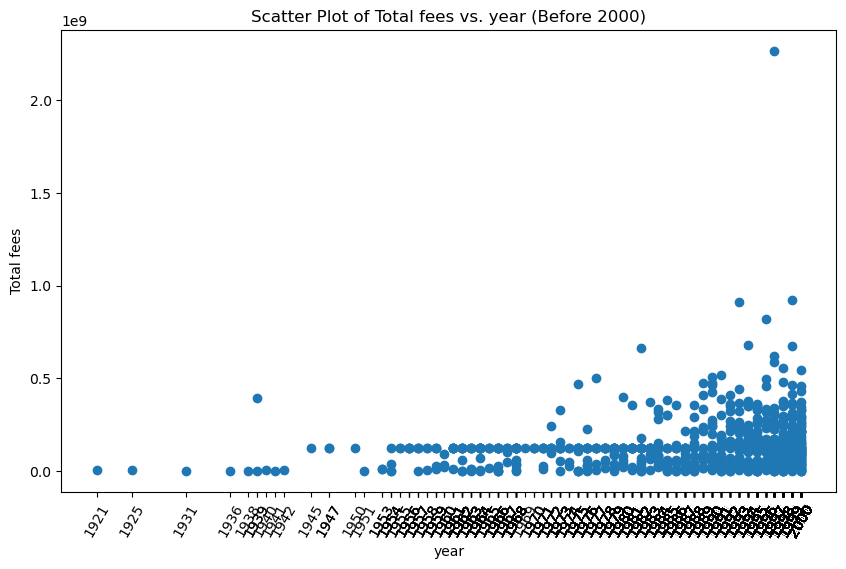

In [296]:
df_filtered = df_final[df_final['year'] <= 2000]

fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_subplot(111)

plt.scatter(df_filtered['year'], df_filtered['fees.world.value'])
plt.xlabel('year')
plt.ylabel('Total fees')
plt.title('Scatter Plot of Total fees vs. year (Before 2000)')

plt.xticks(df_filtered['year'], rotation=60)
plt.show()

Довольно много выбросов и нерепрезентатиыных данных, поэтому берем от 1987 года

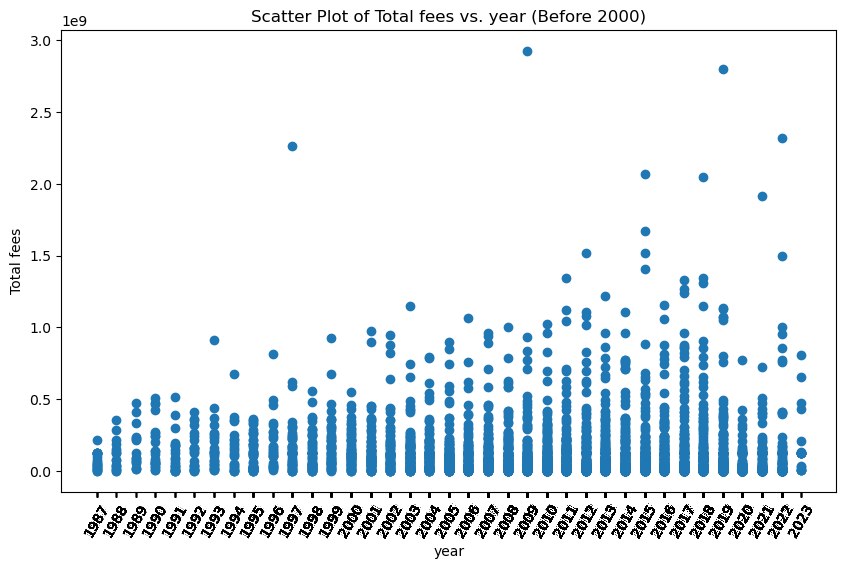

In [297]:
df_filtered = df_final[df_final['year'] >= 1987]

fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_subplot(111)

plt.scatter(df_filtered['year'], df_filtered['fees.world.value'])
plt.xlabel('year')
plt.ylabel('Total fees')
plt.title('Scatter Plot of Total fees vs. year (Before 2000)')

plt.xticks(df_filtered['year'], rotation=60)
plt.show()

Исходя из диаграммы рассеяния, выделяем года, в которые был кризис (шоки различного характера):
- Последствия кризиса 2000-2001 года
- Обострение геополитики (Грузия, санкции, Южная Корея): 2006 год
- Мировой кризис 2008 года
- Пандемия: 2020 год
- Геополитика: 2022-2023 года

In [298]:
# Добавим новую переменную: был кризис - 1, не было кризиса - 0
df_final['Crisis'] = df_final['year'].apply(lambda x: 1 if x in [2000, 2001, 2006, 2008, 2020, 2022, 2021] else 0)

Мы заметили, что когда у фильма был релиз в выходной день, то кассовые сборы были выше
- Гипотеза H0: Средние значения кассовых сборов с релизом во время праздников и вне праздников не отличаются статистически
- Гипотеза H1: Средние значения кассовых сборов с релизом во время праздников и вне праздников отличаются статистически.

In [303]:
from scipy.stats import ttest_ind
df_two = df_final[df_final['year'] >= 1987]
# Создали две выборки на основе значения столбца 'Crisis': значение 'Crisis' равно 1, значение 'Crisis' равно 0
crisis_films = df_two[df_two['Crisis'] == 1]['fees.world.value']
non_crisis_films = df_two[df_two['Crisis'] == 0]['fees.world.value']

# Проведение t-теста
t_statistic, p_value = ttest_ind(crisis_films, non_crisis_films)

# Вывод результатов
print("t-статистика:", round(t_statistic, 3))
print("p-value:", round(p_value, 3))

t-статистика: -2.875
p-value: 0.004


In [305]:
alpha = 0.05 #возьмем уровень значимости равный 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

Отвергаем нулевую гипотезу


- Полученное p-value = 0.004 достаточно маленькое, что говорит о том, что различия в кассовых сборах между кризисными и некризисными фильмами статистически значимы.
- Также отрицательное значение t-статистики = -2.87 указывает на то, что кассовые сборы в периоды кризиса склонны быть ниже, чем вне кризисных периодов.

### Работа с гипотезой о дате выхода

Мы предполагаем, что, когда у фильма был релиз в выходной день, кассовые сборы оказываются в итоге выше.

Гипотеза H0: Средние значения кассовых сборов с релизом во время праздников и вне праздников не отличаются статистически

Гипотеза H1: Средние значения кассовых сборов с релизом во время праздников и вне праздников отличаются статистически.

In [249]:
import scipy.stats as stats
# Разделение данных на две группы по значению колонки "Holiday"
group1 = df_final[df_final['Holiday'] == 1]['fees.world.value']
group2 = df_final[df_final['Holiday'] == 0]['fees.world.value']

# Проверка гипотезы с использованием t-теста Стьюдента
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("t-статистика:", t_statistic)
print("p-value:", p_value)

t-статистика: -1.5146965290146512
p-value: 0.12992981489327188


In [248]:
import numpy as np

# Разделение данных на две группы по значению колонки "Holiday"
group1 = df_final[df_final['Holiday'] == 1]['fees.world.value']
group2 = df_final[df_final['Holiday'] == 0]['fees.world.value']

# Функция для получения бутстрап-выборки
def get_bootstrap_sample(data):
    return np.random.choice(data, size=len(data), replace=True)

# Функция для получения оценки среднего значения из бутстрап-выборки
def get_bootstrap_mean(sample):
    return np.mean(sample)

bootstrap_iterations = 1000
group1_means = [get_bootstrap_mean(get_bootstrap_sample(group1)) for _ in range(bootstrap_iterations)]
group2_means = [get_bootstrap_mean(get_bootstrap_sample(group2)) for _ in range(bootstrap_iterations)]
mean_difference = np.mean(group1_means) - np.mean(group2_means)

print("Среднее значение кассовых сборов в выходные дни:", np.mean(group1_means))
print("Среднее значение кассовых сборов в рабочие дни:", np.mean(group2_means))
print("Разница между средними значениями:", mean_difference)

Среднее значение кассовых сборов в выходные дни: 115990283.50956184
Среднее значение кассовых сборов в рабочие дни: 127899613.54305261
Разница между средними значениями: -11909330.033490777


### Работа с гипотезой о длительности фильма

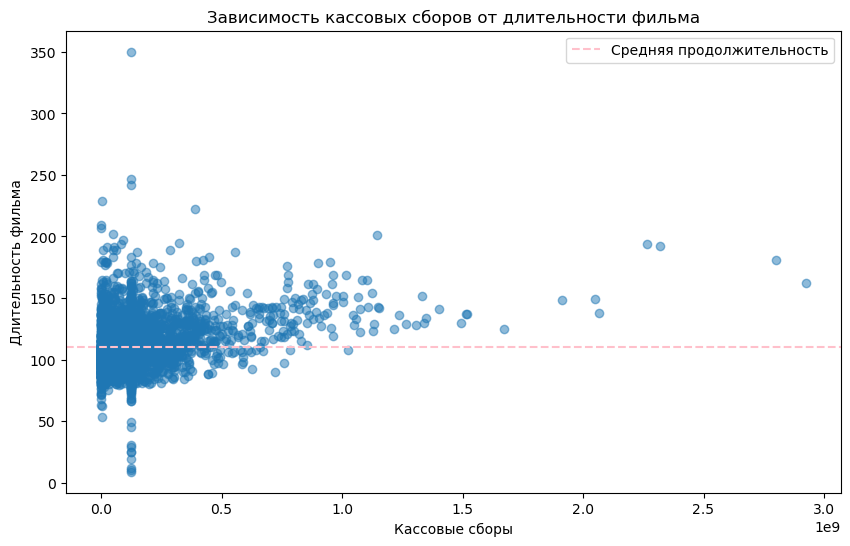

In [212]:
mean_movie_length = df_final['movieLength'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(df_final['fees.world.value'], df_final['movieLength'], alpha=0.5)

plt.axhline(mean_movie_length, color='pink', linestyle='--', label='Средняя продолжительность')
plt.xlabel('Кассовые сборы')
plt.ylabel('Длительность фильма')
plt.title('Зависимость кассовых сборов от длительности фильма')

plt.legend()
plt.show()

In [214]:
fees_median = df_final['fees.world.value'].median()
fees_median

64533088.5

In [215]:
above_avg_movies = df_final[df_final['fees.world.value'] > fees_median]
below_avg_movies = df_final[df_final['fees.world.value'] <= fees_median]

In [219]:
print('Будем считать, что порогом высоко бюджетного фильма является ',  fees_median)

Будем считать, что порогом высоко бюджетного фильма является  64533088.5


In [220]:
print('Средняя продолжительность фильмов с высокими кассовыми сборами', above_avg_movies['movieLength'].mean())
print('MIN продолжительность фильмов с высокими кассовыми сборами', above_avg_movies['movieLength'].min())
print('MAX продолжительность фильмов с высокими кассовыми сборами', above_avg_movies['movieLength'].max())

Средняя продолжительность фильмов с высокими кассовыми сборами 113.5965359144167
MIN продолжительность фильмов с высокими кассовыми сборами 9.0
MAX продолжительность фильмов с высокими кассовыми сборами 350.0


In [221]:
print('Средняя продолжительность фильмов с небольшими кассовыми сборами', below_avg_movies['movieLength'].mean())
print('MIN продолжительность фильмов с небольшими кассовыми сборами', below_avg_movies['movieLength'].min())
print('MAX продолжительность фильмов с небольшими кассовыми сборами', below_avg_movies['movieLength'].max())

Средняя продолжительность фильмов с небольшими кассовыми сборами 107.37697401935813
MIN продолжительность фильмов с небольшими кассовыми сборами 53.0
MAX продолжительность фильмов с небольшими кассовыми сборами 229.0


# Шаг 7. Машинное обучение (максимум 20 баллов)
Скорее всего, в ваших данных есть какая-то переменная, которую есть смысл попробовать предсказать. Подробно объясните, что именно вы собираетесь предсказывать и зачем. Какую задачу вы решаете? Какую метрику вы будете использовать для того, чтобы измерить качество вашей модели?

Аккуратно разбейте выборку на обучающую и тестовую, сделайте всю необходимую предобработку данных и обучите несколько моделей. Подберите для них все необходимые гиперпараметры. Проанализируйте получившиеся результаты и сделайте выводы.

In [203]:
df_final

,movieLength,name,year,genres,fees.world.value,fees.russia.value,fees.usa.value,rating.kp,rating.imdb,rating.filmCritics,...,votes.imdb,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,premiere.world,premiere.russia,budget.value,Holiday,Crisis
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,1725813.0,10198820.0,8.805,8.5,6.8,...,882411,130,12,15,Каскад фильм,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,10355000.0,0,0
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,18003343.0,36471795.0,8.548,7.8,6.5,...,361184,277,22,13642,Вольга,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,0,0
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,13796916.0,116900694.0,7.973,8.2,7.8,...,1465395,289,31,43024,West,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,0,0
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,13318455.0,27466489.0,7.590,7.1,6.3,...,190690,256,37,23492,Вольга,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,0,1
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,4345349.0,65760649.0,8.294,7.8,7.6,...,22847,5,2,0,"Кармен-Премьер, СТВ",1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,45809569.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,95.0,Короли лета,2013,"[драма, комедия, приключения]",1501595.0,4252.0,1315590.0,6.769,7.1,6.9,...,82970,123,1,232,"All Media, Арена",2013-01-19 00:00:00+00:00,2013-10-03 00:00:00+00:00,45809569.0,1,0
3996,116.0,Lil Peep: всё для всех,2019,"[документальный, музыка]",748539.0,198254.0,547207.0,7.877,7.5,7.4,...,3755,21,6,262,A-One Films,2019-01-10 00:00:00+00:00,2019-11-21 00:00:00+00:00,45809569.0,0,0
3997,85.0,Фантомы,2008,[ужасы],48555306.0,1811000.0,25928550.0,6.194,5.2,3.5,...,36172,66,1,0,Двадцатый Век Фокс СНГ,2008-03-19 00:00:00+00:00,2008-04-03 00:00:00+00:00,8000000.0,0,1
3998,103.0,Выход,2019,"[боевик, комедия]",79410586.0,4345349.0,470699.0,7.354,7.0,6.0,...,6843,6,0,37,other,2019-07-31 00:00:00+00:00,2019-07-31 00:00:00+00:00,11500000.0,0,0


# Задача: Предсказание сборов
Будем предсказывать сборы фильма в мировом прокате (fees.world.value) на основе следующих данных:
1. Бюджета фильма (budget.value)
2. Наличие мирового кризиса (Crisis)
3. Дата выхода — является ли это выходным днем (Holiday)

## 1. Обработка данных
Отберем данные для построения модели в отдельный датафрейм:

In [222]:
df_ML = df_two[['name', 'budget.value', 'Crisis', 'Holiday', 'fees.world.value']] #тк мы смотрим на наличие мирового кризиса, отбираем данные с 1987
df_ML

,name,budget.value,Crisis,Holiday,fees.world.value
0,1+1,10355000.0,0,0,426588510.0
1,Джентльмены,22000000.0,0,0,115171795.0
2,Волк с Уолл-стрит,100000000.0,0,0,392000694.0
3,Гнев человеческий,40000000.0,1,0,103966489.0
4,Брат,45809569.0,0,1,1362281.0
...,...,...,...,...,...
3995,Короли лета,45809569.0,0,1,1501595.0
3996,Lil Peep: всё для всех,45809569.0,0,0,748539.0
3997,Фантомы,8000000.0,1,0,48555306.0
3998,Выход,11500000.0,0,0,79410586.0


### Тестовая и обучающая выборки
Разобъем выборку на тестовую и обучающую

In [228]:
from sklearn.model_selection import train_test_split
 
X = df_ML.drop(['name', 'fees.world.value'], axis=1)
y = df_ML['fees.world.value']
 
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Выведем размеры полученных выборок
print("Размер обучающей выборки (X_train):", X_train.shape)
print("Размер тестовой выборки (X_test):", X_test.shape)
print("Размер обучающей выборки (y_train):", y_train.shape)
print("Размер тестовой выборки (y_test):", y_test.shape)

Размер обучающей выборки (X_train): (2906, 3)
Размер тестовой выборки (X_test): (727, 3)
Размер обучающей выборки (y_train): (2906,)
Размер тестовой выборки (y_test): (727,)


Получились следующие данные:

In [229]:
X_train

,budget.value,Crisis,Holiday
3559,45809569.0,0,0
3515,10000000.0,0,0
1012,3000000.0,0,0
1066,16350000.0,0,0
1956,45809569.0,0,0
...,...,...,...
1239,110000000.0,0,0
1412,20000000.0,1,0
930,145000000.0,0,0
3855,40000000.0,0,1


In [230]:
y_train

3559      3124179.0
3515      3061624.0
1012     89328627.0
1066      9995168.0
1956      9757417.0
           ...     
1239    337580051.0
1412     41627431.0
930     694713380.0
3855    190212113.0
3469    102244770.0
Name: fees.world.value, Length: 2906, dtype: float64

In [231]:
X_test

,budget.value,Crisis,Holiday
2367,4.580957e+07,0,0
202,1.830000e+08,0,0
203,9.000000e+07,1,0
2360,4.580957e+07,0,0
2859,3.000000e+06,1,1
...,...,...,...
3635,3.500000e+07,0,0
733,6.011698e+05,1,0
2304,9.000000e+07,0,1
3823,2.500000e+07,0,0


In [232]:
y_test

2367    3.567233e+06
202     1.050694e+09
203     4.296321e+08
2360    1.252756e+08
2859    2.691705e+06
            ...     
3635    2.780563e+07
733     1.684200e+04
2304    2.347986e+08
3823    9.617377e+06
3513    4.672049e+07
Name: fees.world.value, Length: 727, dtype: float64

### Нормирование данных
Далее стандартизируем данные по бюджету budget.value:

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train['budget.value'].values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test['budget.value'].values.reshape(-1, 1))

In [234]:
X_train_scaled

array([[-0.01486929],
       [-0.8022188 ],
       [-0.95612869],
       ...,
       [ 2.16604324],
       [-0.14260502],
       [-0.23055352]])

In [235]:
# Создание нового датафрейма на основе преобразованного массива X_train_scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['budget.value.scaled'], index=X_train.index)

# Объединение исходной таблицы X_train и нового датафрейма X_train_scaled_df
X_train_combined = pd.concat([X_train, X_train_scaled_df], axis=1)

In [236]:
# Создание нового датафрейма на основе преобразованного массива X_train_scaled
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=['budget.value.scaled'], index=X_test.index)

# Объединение исходной таблицы X_train и нового датафрейма X_train_scaled_df
X_test_combined = pd.concat([X_test, X_test_scaled_df], axis=1)

Теперь удалим исходный столбец budget.value:

In [237]:
X_train_combined = X_train_combined.drop('budget.value', axis=1)
X_test_combined = X_test_combined.drop('budget.value', axis=1)

In [238]:
X_test_combined

,Crisis,Holiday,budget.value.scaled
2367,0,0,-0.014869
202,0,0,3.001554
203,1,0,0.956751
2360,0,0,-0.014869
2859,1,1,-0.956129
...,...,...,...
3635,0,0,-0.252541
733,1,0,-1.008872
2304,0,1,0.956751
3823,0,0,-0.472412


In [239]:
X_train_combined

,Crisis,Holiday,budget.value.scaled
3559,0,0,-0.014869
3515,0,0,-0.802219
1012,0,0,-0.956129
1066,0,0,-0.662601
1956,0,0,-0.014869
...,...,...,...
1239,0,0,1.396494
1412,1,0,-0.582348
930,0,0,2.166043
3855,0,1,-0.142605


# Обучение модели

Так как мы предсказывает сборы фильма (числовую переменную), будем использовать модель линейной регрессии:

In [336]:
from sklearn.linear_model import LinearRegression

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных
model.fit(X_train_combined, y_train)

# Прогнозирование значений на тестовых данных
y_pred = model.predict(X_test_combined)

Теперь оценим качество модели:

In [337]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

94719712.16960852

In [338]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

2.297562679934996e+16

In [339]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5040656727456276

In [340]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

100.69014057486551

In [342]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Задаем модель градиентного бустинга
model = GradientBoostingRegressor()

# Задаем сетку параметров для подбора
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Обучаем модель с использованием Grid Search
grid_search.fit(X_train_combined, y_train)

# Получаем лучшие параметры
best_params = grid_search.best_params_

# Создаем модель с лучшими параметрами
best_model = GradientBoostingRegressor(**best_params)

# Обучаем модель с лучшими параметрами
best_model.fit(X_train_combined, y_train)

# Предсказываем значения на обучающем и тестовом наборах данных
y_train_pred = best_model.predict(X_train_combined)
y_test_pred = best_model.predict(X_test_combined)

# Оцениваем качество модели
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("Best Parameters: ", best_params)
print("Train MAPE: ", train_mape)
print("Test MAPE: ", test_mape)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Train MAPE:  136.15542860256627
Test MAPE:  112.80602486920606


In [343]:
params = {
    'n_estimators': 300,
    'learning_rate': 0.01,
    'max_depth': 3,
    'random_state': 42
}

my_model = GradientBoostingRegressor(**params)
my_model.fit(X_train_combined, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [344]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Прогнозирование на обучающем наборе данных
y_train_pred = my_model.predict(X_train_combined)

# Прогнозирование на тестовом наборе данных
y_test_pred = my_model.predict(X_test_combined)

# Оценка качества на обучающем наборе данных
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Оценка качества на тестовом наборе данных
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MAE:", train_mae)
print("Train MSE:", train_mse)
print("Train R^2:", train_r2)

print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

Train MAE: 75884026.916154
Train MSE: 1.613339897304322e+16
Train R^2: 0.6280055095063308
Test MAE: 83514395.7378367
Test MSE: 2.107309680064289e+16
Test R^2: 0.5451322318097203


In [345]:
import numpy as np

# Расчет MAPE на обучающем наборе данных
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Расчет MAPE на тестовом наборе данных
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

Train MAPE: 136.15542860256633
Test MAPE: 112.80602937271786


Результаты оказались хуже, чем при обычной линейной регрессии.

In [346]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Создание модели Lasso
lasso = Lasso()

# Задание сетки параметров для подбора
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5]}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)

# Подбор параметров на тренировочных данных
grid_search.fit(X_train_combined, y_train)

# Получение наилучших параметров
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Предсказание на тестовых данных с использованием модели с наилучшими параметрами
lasso_best = Lasso(alpha=best_params['alpha'])
lasso_best.fit(X_train_combined, y_train)
y_pred = lasso_best.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Best Parameters: {'alpha': 1.5}
Root Mean Squared Error: 2075905689828189.5


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- budget.value
Feature names seen at fit time, yet now missing:
- budget.value.scaled

  warnings.warn(message, FutureWarning)


In [350]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.5)
lasso.fit(X_train_combined, y_train)

# Оценка модели
y_pred = lasso.predict(X_test_combined)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.297562688492741e+16


In [351]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 100.69013846010482


Незначительно отличается от линейной регрессии.